# 강의안 9  통계적 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Scipy.stats 패키지 

### T 검정

#### 단일 표본 t 검정

In [2]:
potato_chip = np.array([89.03, 95.07, 88.26, 90.07, 90.6, 87, 87.67, 88.8, 90.46, 81.33])

In [3]:
stats.describe(potato_chip)

DescribeResult(nobs=10, minmax=(81.33, 95.07), mean=88.82900000000001, variance=11.952809999999987, skewness=-0.49503820118117087, kurtosis=1.0716305133799517)

In [4]:
print(potato_chip.mean())
print(potato_chip.var())

88.82900000000001
10.757528999999987


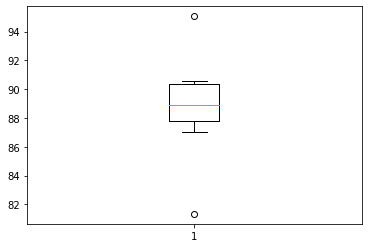

In [5]:
plt.boxplot(potato_chip)
plt.show()

In [6]:
stats.ttest_1samp(potato_chip, 90)

Ttest_1sampResult(statistic=-1.071079943556364, pvalue=0.31201445250451004)

#### 독립 표본 t 검정

In [7]:
tips = sns.load_dataset("tips")

In [8]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [10]:
tips.groupby("sex").mean()

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [11]:
tip_Male = tips[tips['sex'] == "Male"]["tip"]
tip_Female = tips[tips['sex'] == "Female"]['tip']

In [12]:
print(tip_Male.mean())
print(tip_Female.mean())

3.0896178343949052
2.833448275862069


<AxesSubplot:xlabel='sex', ylabel='tip'>

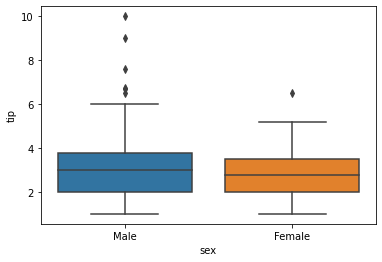

In [13]:
sns.boxplot(data=tips, x='sex', y='tip')

<AxesSubplot:xlabel='tip', ylabel='Count'>

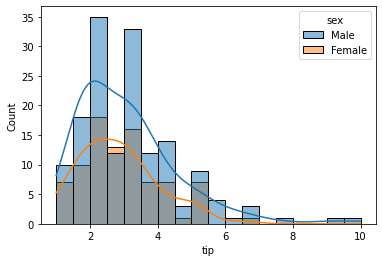

In [14]:
sns.histplot(data=tips, x='tip', hue='sex', kde=True)

In [15]:
stats.levene(tip_Male, tip_Female)     # 등분산 levene 검증
#귀무 가설(차이 없다:같다)

LeveneResult(statistic=1.9909710178779405, pvalue=0.1595236359896614)

In [16]:
stats.bartlett(tip_Male, tip_Female)    # 등분산 bartlett 검증
#대립가설(차이있다:다르다)

BartlettResult(statistic=6.5285970668535835, pvalue=0.010615365104447008)

In [17]:
stats.ttest_ind(tip_Male, tip_Female, equal_var = True)

Ttest_indResult(statistic=1.3878597054212687, pvalue=0.16645623503456763)

In [18]:
stats.ttest_ind(tip_Male, tip_Female, equal_var= False)

Ttest_indResult(statistic=1.489536377092501, pvalue=0.13780683808650296)

#### 대응표본 t 검증

In [19]:
#sicpy 와이드 format
# 데이터 사이언스 인과관계 할 수 없음
milk = pd.DataFrame({"cow":[1,2,3,4,5,6,7,8],
                    "type1":[52, 60, 63, 43, 46, 56, 62, 50],
                    "type2":[58, 62, 62, 48, 50, 55, 68, 57]})

In [20]:
milk

,cow,type1,type2
0,1,52,58
1,2,60,62
2,3,63,62
3,4,43,48
4,5,46,50
5,6,56,55
6,7,62,68
7,8,50,57


In [21]:
milk_long = pd.melt(milk, id_vars="cow", var_name="type", value_name = "amount")

In [22]:
milk_long

,cow,type,amount
0,1,type1,52
1,2,type1,60
2,3,type1,63
3,4,type1,43
4,5,type1,46
5,6,type1,56
6,7,type1,62
7,8,type1,50
8,1,type2,58
9,2,type2,62


<AxesSubplot:xlabel='type', ylabel='amount'>

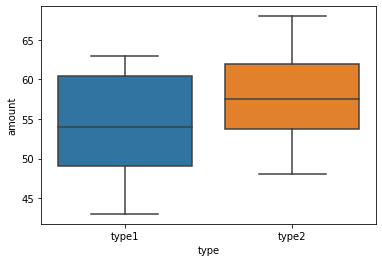

In [23]:
sns.boxplot(data=milk_long, x="type", y="amount")

In [24]:
stats.ttest_rel(milk.type1, milk.type2)      # 대응표본 t 검정

Ttest_relResult(statistic=-3.1304951684997055, pvalue=0.016598218188623597)

In [25]:
stats.ttest_ind(milk.type1, milk.type2)     # 독립표본 t 검정
#분산 커짐
# 독립적인 표본은 16개를 하기에

Ttest_indResult(statistic=-0.9942196047545966, pvalue=0.3369901289582852)

### 분산분석, 상관분석, 회귀분석

#분산분석: 데이터 n개의 차이점이 존제하는가?
#적은 값은 유의미하다.

#### 일원 분산분석

In [26]:
data = pd.DataFrame({"A": [2.05, 1.95, 2.27, 1.93, 1.96],
                     "B": [1.92, 1.31, 1.54, 1.57, 1.67],
                     "C": [3.15, 3.12, 3.25, 2.68, 3.24]})
data

,A,B,C
0,2.05,1.92,3.15
1,1.95,1.31,3.12
2,2.27,1.54,3.25
3,1.93,1.57,2.68
4,1.96,1.67,3.24


In [27]:
data_long = pd.melt(data, var_name="machine", value_name="defect_rate")

In [28]:
data_long

,machine,defect_rate
0,A,2.05
1,A,1.95
2,A,2.27
3,A,1.93
4,A,1.96
5,B,1.92
6,B,1.31
7,B,1.54
8,B,1.57
9,B,1.67


<AxesSubplot:xlabel='machine', ylabel='defect_rate'>

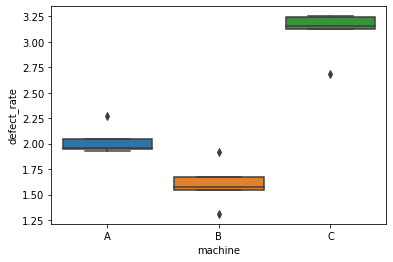

In [29]:
sns.boxplot(data=data_long, x="machine", y="defect_rate")

In [30]:
stats.f_oneway(data.A, data.B, data.C)
#귀무가설을 말고 대립가설을 채택
#귀무가설이 무엇이고, 대립가설이 무엇인가?
#무엇을 기각하고 무엇을

F_onewayResult(statistic=70.75330751855434, pvalue=2.2820486834030845e-07)

#### 상관분석

#

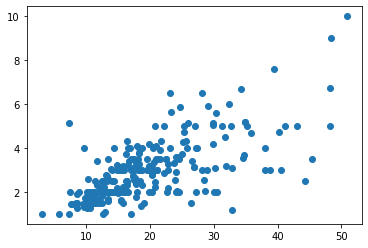

In [31]:
plt.scatter(tips.total_bill, tips.tip)

In [32]:
stats.pearsonr(tips.total_bill, tips.tip)

(0.6757341092113645, 6.692470646863477e-34)

#### 회귀분석

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

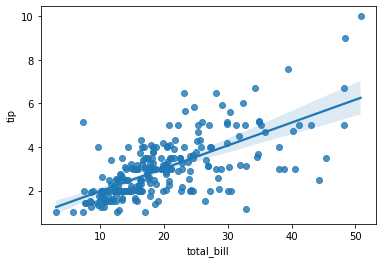

In [33]:
sns.regplot(data=tips, x="total_bill", y="tip")

In [34]:
stats.linregress(tips.total_bill, tips.tip)
#pvalue 값이 크면 기울기는 0이 아니다

LinregressResult(slope=0.1050245173843534, intercept=0.9202696135546726, rvalue=0.6757341092113641, pvalue=6.692470646864404e-34, stderr=0.007364789848762602, intercept_stderr=0.1597347463764325)

## statsmodels 패키지

In [35]:
import statsmodels.api as sm
from patsy import dmatrices
import statsmodels.formula.api as smf

#### 데이터셋 준비하기

In [36]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data

In [37]:
df

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,86,W,Vienne,15010,4710,25,8922,35224,21851,2:Med,...,20,1,44,40,38,65,18,170.523,6990,282.73
82,87,C,Haute-Vienne,16256,6402,13,13817,19940,33497,2:Med,...,68,6,78,55,11,84,7,198.874,5520,285.13
83,88,E,Vosges,18835,9044,62,4040,14978,33029,2:Med,...,58,34,5,14,85,11,43,174.477,5874,397.99
84,89,C,Yonne,18006,6516,47,4276,16616,12789,2:Med,...,32,22,35,51,66,27,272,81.797,7427,352.49


In [40]:
vars = ["Department", "Lottery", "Literacy", "Wealth", "Region"]
df = df[vars]
df

,Department,Lottery,Literacy,Wealth,Region
0,Ain,41,37,73,E
1,Aisne,38,51,22,N
2,Allier,66,13,61,C
3,Basses-Alpes,80,46,76,E
4,Hautes-Alpes,79,69,83,E
...,...,...,...,...,...
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Department  86 non-null     object
 1   Lottery     86 non-null     int64 
 2   Literacy    86 non-null     int64 
 3   Wealth      86 non-null     int64 
 4   Region      85 non-null     object
dtypes: int64(3), object(2)
memory usage: 3.5+ KB


In [42]:
df = df.dropna()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Department  85 non-null     object
 1   Lottery     85 non-null     int64 
 2   Literacy    85 non-null     int64 
 3   Wealth      85 non-null     int64 
 4   Region      85 non-null     object
dtypes: int64(3), object(2)
memory usage: 4.0+ KB


#### statsmodels.formula.api 방식을 이용한 방식

In [47]:
mod = smf.ols(formula="Lottery ~ Literacy + Wealth", data=df)

In [48]:
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     18.32
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           2.66e-07
Time:                        06:46:18   Log-Likelihood:                -377.13
No. Observations:                  85   AIC:                             760.3
Df Residuals:                      82   BIC:                             767.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.7979      7.873      5.055      0.0

#### statsmodel.api 방식을 이용

In [49]:
y, X = dmatrices('Lottery ~ Literacy + Wealth', data=df, return_type="dataframe")

In [50]:
y

,Lottery
0,41.0
1,38.0
2,66.0
3,80.0
4,79.0
...,...
80,68.0
81,40.0
82,55.0
83,14.0


In [51]:
X

,Intercept,Literacy,Wealth
0,1.0,37.0,73.0
1,1.0,51.0,22.0
2,1.0,13.0,61.0
3,1.0,46.0,76.0
4,1.0,69.0,83.0
...,...,...,...
80,1.0,28.0,56.0
81,1.0,25.0,68.0
82,1.0,13.0,67.0
83,1.0,62.0,82.0


In [52]:
mod = sm.OLS(y, X)

In [53]:
res = mod.fit()

In [54]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     18.32
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           2.66e-07
Time:                        06:50:11   Log-Likelihood:                -377.13
No. Observations:                  85   AIC:                             760.3
Df Residuals:                      82   BIC:                             767.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.7979      7.873      5.055      0.0

#### interaction effect 포함하는 모형

In [58]:
mod = smf.ols(formula="Lottery ~ Literacy + Wealth + Literacy:Wealth", data=df)

In [59]:
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     12.06
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           1.32e-06
Time:                        07:22:59   Log-Likelihood:                -377.13
No. Observations:                  85   AIC:                             762.3
Df Residuals:                      81   BIC:                             772.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          38.6348     15.825     

In [ ]:
#### category 변수를 포함하는 모형

In [60]:
mod = smf.ols(formula="Lottery ~ Literacy + Wealth + Region", data=df)

In [61]:
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           1.07e-05
Time:                        07:24:15   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

### tips 데이터 셋에 대한 분석

In [62]:
y, X = dmatrices('tip ~ total_bill', data=tips, return_type = 'dataframe')

In [63]:
y

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


In [64]:
X

,Intercept,total_bill
0,1.0,16.99
1,1.0,10.34
2,1.0,21.01
3,1.0,23.68
4,1.0,24.59
...,...,...
239,1.0,29.03
240,1.0,27.18
241,1.0,22.67
242,1.0,17.82


In [65]:
mod1 = sm.OLS(y, X)

In [66]:
mod1 = mod1.fit()

In [67]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           6.69e-34
Time:                        07:26:14   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multiple regression

In [68]:
y, X = dmatrices('tip ~ total_bill + sex + smoker + day + time + size', data = tips, return_type = 'dataframe')

In [69]:
y

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


In [70]:
X

,Intercept,sex[T.Female],smoker[T.No],day[T.Fri],day[T.Sat],day[T.Sun],time[T.Dinner],total_bill,size
0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,16.99,2.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,10.34,3.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,21.01,3.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,23.68,2.0
4,1.0,1.0,1.0,0.0,0.0,1.0,1.0,24.59,4.0
...,...,...,...,...,...,...,...,...,...
239,1.0,0.0,1.0,0.0,1.0,0.0,1.0,29.03,3.0
240,1.0,1.0,0.0,0.0,1.0,0.0,1.0,27.18,2.0
241,1.0,0.0,0.0,0.0,1.0,0.0,1.0,22.67,2.0
242,1.0,0.0,1.0,0.0,1.0,0.0,1.0,17.82,2.0


In [71]:
mod2 = sm.OLS(y, X)

In [72]:
mod2 = mod2.fit()

In [70]:
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           1.20e-28
Time:                        17:03:18   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5908      0.256      2.310      0.022       0.087       1.095
sex[T.Female]      0.0324      0.142      0.229      0.819      -0.247       0.311
smoker[T.No]       0.0864      0.147      0.589      0.556      -0.202       0.375
day[T.Fri]         0.1623      0.393      0.412      0.680      -0.613       0.937
day[T.Sat]         0.0408      0.471      0.087      0.931      -0.886       0.968
day[T.Sun]         0.1368      0.472      0.290      0.772      -0.793       1.066
time[T.Dinner]    -0.0681      0.445     -0.153      0.878      -0.944       0.808
total_bill         0.0945      0.010      9.841      0.000       0.076       0.113
size               0.1760      0.090      1.966      0.051      -0.000       0.352
==============================================================================
Omnibus:                       27.860   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.555
Skew:                           0.607   Prob(JB):                     3.87e-12
Kurtosis:                       4.923   Cond. No.                         281.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
mod2.params

Intercept         0.590837
sex[T.Female]     0.032441
smoker[T.No]      0.086408
day[T.Fri]        0.162259
day[T.Sat]        0.040801
day[T.Sun]        0.136779
time[T.Dinner]   -0.068129
total_bill        0.094487
size              0.175992
dtype: float64

In [74]:
mod3 = smf.ols(formula = "tip ~ total_bill + size", data=tips).fit()

In [75]:
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           9.67e-34
Time:                        07:29:11   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.0